In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("datasets\\churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


<Axes: xlabel='Churn'>

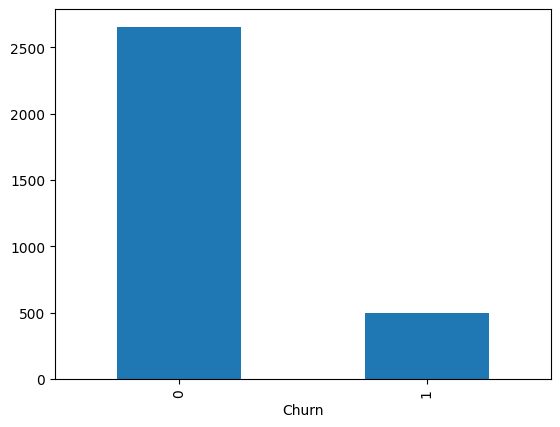

In [6]:
df["Churn"].value_counts().plot(kind="bar")

In [7]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

### Simple logistic regression model

In [14]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
c_r = classification_report(y_pred=y_pred, y_true=y_test)
print(c_r)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       520
           1       0.73      0.42      0.53       110

    accuracy                           0.87       630
   macro avg       0.81      0.69      0.73       630
weighted avg       0.86      0.87      0.86       630



#### Very unlikely to predict the rare class (0.42 recall) due to imbalance in the data

In [17]:
y_train.value_counts()

Churn
0    2135
1     385
Name: count, dtype: int64

### Using undersampling to help the outcome and to balance the data distribution

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y_train_rus.value_counts()

Churn
0    385
1    385
Name: count, dtype: int64

In [16]:
model_rus = LogisticRegression(max_iter=10000)
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test)
class_rep_rus = classification_report(y_pred=y_pred_rus, y_true=y_test)
print(class_rep_rus)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       520
           1       0.49      0.81      0.61       110

    accuracy                           0.82       630
   macro avg       0.72      0.82      0.75       630
weighted avg       0.87      0.82      0.84       630



#### There is overall improvement, but the precision when recognizing the rare data is still very low(however recall has increased significantly)

In [18]:

model_balanced = LogisticRegression(max_iter=100000,class_weight="balanced")
model_balanced.fit(X_train, y_train)

y_pred_balanced = model_balanced.predict(X_test)
c_r_balanced = classification_report(y_pred=y_pred_balanced, y_true=y_test)
print(c_r_balanced)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       520
           1       0.49      0.81      0.61       110

    accuracy                           0.82       630
   macro avg       0.72      0.82      0.75       630
weighted avg       0.87      0.82      0.83       630



#### SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(max_iter=10000)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)
c_r_smote = classification_report(y_pred=y_pred_smote, y_true=y_test)
print(c_r_smote)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       520
           1       0.47      0.80      0.59       110

    accuracy                           0.80       630
   macro avg       0.71      0.80      0.73       630
weighted avg       0.87      0.80      0.82       630



In [24]:
y_train_smote.value_counts()

Churn
0    2135
1    2135
Name: count, dtype: int64

In [25]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

model_smote_tomek = LogisticRegression(max_iter=10000)
model_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)
y_pred_smote_tomek = model_smote_tomek.predict(X_test)
c_r_smote_tomek = classification_report(y_pred=y_pred_smote_tomek, y_true=y_test)
print(c_r_smote_tomek)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       520
           1       0.47      0.80      0.59       110

    accuracy                           0.81       630
   macro avg       0.71      0.80      0.73       630
weighted avg       0.87      0.81      0.82       630



In [26]:
y_train_smote_tomek.value_counts()

Churn
0    2108
1    2108
Name: count, dtype: int64

#### Conclusion: seems like a limit for classic Logistic Regression